# August 17 2025


In [26]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
data1 = np.random.normal(loc = 100, scale = 10, size = 1000)
data2 = np.random.normal(loc = 100, scale = 30, size = 1000)
data3 = np.random.normal(loc = 100, scale = 60, size = 1000)

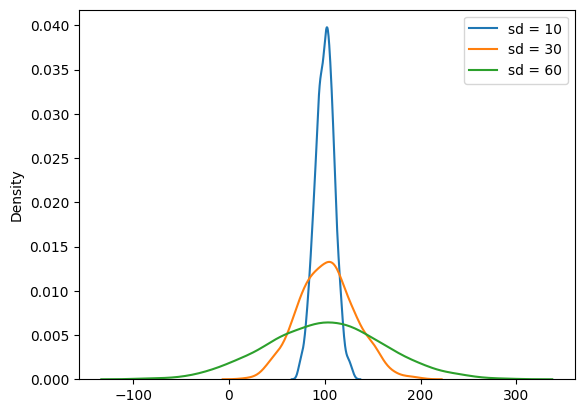

In [9]:
sns.kdeplot(data1, label = 'sd = 10')
sns.kdeplot(data2, label = 'sd = 30')
sns.kdeplot(data3, label = 'sd = 60')
plt.legend()
plt.show()

## Probability Distribution in python

```python
import scipy.stats as stats
```

In [11]:
import scipy.stats as stats

stats.norm.cdf --> cumulative denstity function

```python
stats.norm.cdf( x = value , loc = mean, scale = standard deviation)
```

returns: prob left tail probability (area)


**Question:** The average stock price for companies making up the S&P 500 is \$30, and the standard deviation is \$8.20.

Assume the stock prices are normally distributed.

a. What is the probability a company will have a stock price no higher than $20?

In [13]:
# stock price < $20
# -inf to $20 left tail probability

# the x value
x = 20

# the pop mean
mu = 30

# the pop standrad deviation
sigma = 8.20

# probability < 20
prob_lessthan_20 = stats.norm.cdf(x = x, loc = mu, scale = sigma)
print(f"The prob that the stock price < 20 is {prob_lessthan_20:.4f}")

The prob that the stock price < 20 is 0.1113


b. What is the probability a company will have a stock price of at least $40?

- prob that stock price 40 and above
- limits 40 and + inf


In [14]:
# probability > 40
x = 40
prob_greaterthan_40 = 1 - stats.norm.cdf(x = x, loc = mu, scale = sigma)
print(f"The prob that the stock price > 40 is {prob_greaterthan_40:.4f}")

The prob that the stock price > 40 is 0.1113


c. What is the probability a company will have a stock price between \$20 and \$40?

```python
1 - (1 - stats.norm.cdf(x = 40, loc = mu, scale = sigma) + stats.norm.cdf(x = 20, loc = mu, scale = sigma))

1 - 1 + stats.norm.cdf(x = 40, loc = mu, scale = sigma) - stats.norm.cdf(x = 20, loc = mu, scale = sigma)

stats.norm.cdf(x = 40, loc = mu, scale = sigma) - stats.norm.cdf(x = 20, loc = mu, scale = sigma)

```

In [16]:
# probability between 20 and 40
x_ll = 20
x_ul = 40
prob_between = stats.norm.cdf(x = x_ul, loc = mu, scale = sigma) - stats.norm.cdf(x = x_ll, loc = mu, scale = sigma)
print(f"The prob that the stock price between 20 and 40 is {prob_between:.4f}")

The prob that the stock price between 20 and 40 is 0.7774


d. How high does a stock price have to be to put a company in the top 10%?

```python
stats.norm.ppf --> percent poitn function
stats.norm.ppf(q = left tail area, loc = mean, scale = sigma)
```

In [17]:
# top 10th percentile --> right tail area = 0.10
# left tail area --> 1 - 0.1

q = 1 - 0.1
x = stats.norm.ppf(q = q, loc = mu, scale = sigma)
print(f"The minimum stock price for a company to be in top 10% is {x:.2f}")

The minimum stock price for a company to be in top 10% is 40.51


## Sampling Distribution

```
2. The College Board reported the following mean scores for the three parts of the Scholastic Aptitude Test (SAT):
```

|Subject|Mean Score|
|-|-|
| Critical Reading 	| 502|
|Mathematics|	515|
|Writing	|494|

```
Assume that the population standard deviation on each part of the test is σ = 100.

```

In [18]:
sigma = 100

What is the probability a random sample of 90 test takers will provide a sample mean test score within 10 points of the population mean of 502 on the Critical Reading part of the test?

In [21]:
from math import sqrt

In [23]:
mu_cr = 502
n_cr = 90
ll = mu_cr - 10
ul = mu_cr + 10
prob_cr = stats.norm.cdf(x = ul, loc = mu_cr, scale = sigma/sqrt(n_cr)) - stats.norm.cdf(x = ll, loc = mu_cr, scale = sigma/sqrt(n_cr))
print(f"The prob that a sample of 90 test takers is going to score wwithin 10 pts is {prob_cr *100:.1f}")

The prob that a sample of 90 test takers is going to score wwithin 10 pts is 65.7


What is the probability a random sample of 90 test takers will provide a sample mean test score within 10 points of the population mean of 515 on the Mathematics part of the test?

In [24]:
mu_mat= 515
n_mat = 90
ll = mu_mat - 10
ul = mu_mat + 10
prob_mat = stats.norm.cdf(ul, loc = mu_mat, scale = sigma/ sqrt(n_mat)) - stats.norm.cdf(ll, loc = mu_mat, scale = sigma/ sqrt(n_mat))
print(f"The prob that a sample of 90 test takers is going to score within 10 pts is {prob_mat *100:.1f}")

The prob that a sample of 90 test takers is going to score within 10 pts is 65.7


What is the probability a random sample of 100 test takers will provide a sample mean test score within 10 points of the population mean of 494 on the Writing part of the test?

In [25]:
mu_wr= 494
n_wr = 100
ll = mu_wr - 10 # - 1std
ul = mu_wr + 10 # + 1std
prob_wr = stats.norm.cdf(ul, loc = mu_wr, scale = sigma/ sqrt(n_wr)) - stats.norm.cdf(ll, loc = mu_wr, scale = sigma/ sqrt(n_wr))
print(f"The prob that a sample of 100 test takers is going to score within 10 pts is {prob_wr *100:.1f}")

The prob that a sample of 100 test takers is going to score within 10 pts is 68.3


## Confidence Interval

For 95% CI

$\mu_{LL} = \bar{X} - z_1 \cdot \frac{\sigma}{\sqrt{n}}$

$\mu_{UL} = \bar{X} + z_2 \cdot \frac{\sigma}{\sqrt{n}}$

bcoz of symmetry area on left of $z_1$ = 0.5 - (.95/2) = 0.025

bcoz of symmetry area on right of $z_2$ = 0.5 - (.95/2) = 0.025

In [27]:
z1 = stats.norm.ppf(0.025, loc = 0, scale = 1) # default for loc and scale is 0 and 1 respectively
print(f'LL z = {z1:6.2f}')

z2 = stats.norm.ppf(1 - 0.025, loc = 0, scale = 1) # default for loc and scale is 0 and 1 respectively
print(f'UL z = {z2:6.2f}')

LL z =  -1.96
UL z =   1.96


$ CI_\mu = \bar{X} \;\pm\; z_{\alpha/2} \cdot \frac{\sigma}{\sqrt{n}}$

$ z_{\alpha/2} \cdot \frac{\sigma}{\sqrt{n}}$ --> margin of error

**if C is confidence**

$\alpha = 1 - confidence$

Playbill magazine reported that the mean annual household income of its readers is \$119K. Assume this estimate of the mean annual household income is based on a sample of 80 households, and based on past studies, the population standard deviation is known to be σ = \$30K


In [28]:
# sample mean
xbar = 119

# sample size
n = 80

# pop std dev
sigma = 30

a. Develop a 90% confidence interval estimate of the population mean.

In [30]:
# self calculation
c = 0.90
alpha = 1 -c
z_alpha_by_2 = stats.norm.ppf(alpha/2) # for z distribution mean and std are 0 and 1 respectively which are also default
mu_1 = xbar - (z_alpha_by_2 * sigma/sqrt(n))
mu_2 = xbar + (z_alpha_by_2 * sigma/sqrt(n))
if mu_1 < mu_2:
  print(f"90%CI -- $ {mu_1:.2f}K to $ {mu_2:.2f}K")
else :
  print(f"90%CI -- $ {mu_2:.2f}K to $ {mu_1:.2f}K")

90%CI -- $ 113.48K to $ 124.52K


```python
stats.norm.interval(confidence = c, loc = mean, scale = std of the distribution)
```

In [32]:
# built-in method
c =0.90
mu_ll, mu_ul = stats.norm.interval(c, loc = xbar, scale = sigma/sqrt(n))
print(f"90% CI = {mu_ll:.2f} K to {mu_ul:.2f} K")

90% CI = 113.48 K to 124.52 K


In [34]:
# built-in method
c =0.95
mu_ll, mu_ul = stats.norm.interval(c, loc = xbar, scale = sigma/sqrt(n))
print(f"95% CI = {mu_ll:.2f} K to {mu_ul:.2f} K")

95% CI = 112.43 K to 125.57 K


In [35]:
# built-in method
c =0.98
mu_ll, mu_ul = stats.norm.interval(c, loc = xbar, scale = sigma/sqrt(n))
print(f"98% CI = {mu_ll:.2f} K to {mu_ul:.2f} K")

98% CI = 111.20 K to 126.80 K


t distribution

```python
stats.t.cdf(x = , df = dof, loc = mean, scale = sample_std/sqrt(sample_size ))
stats.t.ppf(q = , df = dof, loc = mean, scale = sample_std/sqrt(sample_size ))
stats.t.interval(confidence = , df = dof, loc = mean, scale = sample_std/sqrt(sample_size ))
```